In [1]:
# Bechdel Rating: The actual score. Number from 0 to 3 
# 0 means no two women
# 1 means no talking
# 2 means talking about a man 
# 3 means it passes the test

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV Files
award_bechdel_csv_path = "award_movies_bechdel.csv"
award_bechdel_df = pd.read_csv(award_bechdel_csv_path)
topgross_bechdel_csv_path = "topgross_movie_bechdel.csv"
topgross_bechdel_df = pd.read_csv(topgross_bechdel_csv_path)

In [3]:
# Set award-winning movie ID variable and view dataframe
award_bechdel_df

,Unnamed: 0,category,year,Movie Title,IMDB ID,Bechdel Score
0,0,OUTSTANDING PICTURE,1927,Wings,18578,1
1,1,OUTSTANDING PICTURE,1928,The Broadway Melody,19729,3
2,2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,20629,0
3,3,OUTSTANDING PRODUCTION,1930,Cimarron,21746,3
4,4,OUTSTANDING PRODUCTION,1931,Grand Hotel,22958,3
...,...,...,...,...,...,...
88,88,BEST PICTURE,2015,Spotlight,1895587,1
89,89,BEST PICTURE,2016,Moonlight,4975722,1
90,90,BEST PICTURE,2017,The Shape of Water,5580390,3
91,91,BEST PICTURE,2018,Green Book,6966692,1


In [4]:
# Set top_grossing movie ID variable and view dataframe
topgross_bechdel_df

,Year,Movie ID,Movie Title,Revenue,IMDB ID,Bechdel Score
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,221007,Unknown
1,1928,173689,Lights of New York,1200000,19096,Unknown
2,1929,65203,The Broadway Melody,4358000,19729,3
3,1930,166307,Tom Sawyer,11000000,70814,Unknown
4,1931,3035,Frankenstein,12000000,21884,1
...,...,...,...,...,...,...
88,2015,140607,Star Wars: The Force Awakens,2068223624,7768640,3
89,2016,271110,Captain America: Civil War,1153296293,3498820,3
90,2017,181808,Star Wars: The Last Jedi,1332539889,3486354,3
91,2018,299536,Avengers: Infinity War,2046239637,4154756,3


In [5]:
# Count films by bechdel score
award_bechdel_count = award_bechdel_df["Bechdel Score"].value_counts()
print(award_bechdel_count)

3          42
1          31
2           8
Unknown     7
0           5
Name: Bechdel Score, dtype: int64


In [6]:
award_pie_df = pd.DataFrame(award_bechdel_count)
award_pie_df = award_pie_df.rename(columns={"Bechdel Score": "Number of Films"})
award_pie_df["Bechdel Score"] = award_pie_df.index
award_pie_df.index = range(5)
award_pie_df

,Number of Films,Bechdel Score
0,42,3
1,31,1
2,8,2
3,7,Unknown
4,5,0


In [7]:
# Labels for the sections of our Best Picture pie chart
bechdel_results = ["3 - Passes the Bechdel Test", 
                   "1 - Women present; don't talk to one another", 
                   "2 - Women present; talk about a man", 
                   "Unknown", 
                   "0 - Film does not contain two women characters"]

award_pie_df["Bechdel Result"] = bechdel_results

award_pie_df = award_pie_df.sort_values(["Bechdel Result"])

award_pie_df

,Number of Films,Bechdel Score,Bechdel Result
4,5,0,0 - Film does not contain two women characters
1,31,1,1 - Women present; don't talk to one another
2,8,2,2 - Women present; talk about a man
0,42,3,3 - Passes the Bechdel Test
3,7,Unknown,Unknown


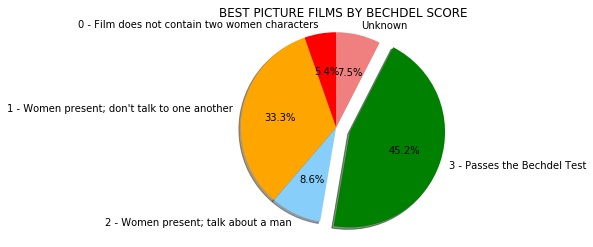

In [8]:
# Labels for the sections of our pie chart
labels = award_pie_df["Bechdel Result"]

# The values of each section of the pie chart
number_of_films = award_pie_df["Number of Films"]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightskyblue", "green", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0, 0.15, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(number_of_films, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("BEST PICTURE FILMS BY BECHDEL SCORE")
plt.axis("equal")

plt.show()

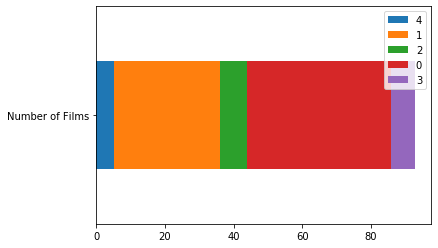

In [9]:
award_pie_df[['Number of Films']].T.plot(kind='barh', stacked=True)

In [10]:
topgross_bechdel_count = topgross_bechdel_df["Bechdel Score"].value_counts()
print(topgross_bechdel_count)

3          39
1          21
Unknown    14
2          10
0           9
Name: Bechdel Score, dtype: int64


In [11]:
topgross_pie_df = pd.DataFrame(topgross_bechdel_count)
topgross_pie_df = topgross_pie_df.rename(columns={"Bechdel Score": "Number of Films"})
topgross_pie_df["Bechdel Score"] = topgross_pie_df.index
topgross_pie_df.index = range(5)
topgross_pie_df

,Number of Films,Bechdel Score
0,39,3
1,21,1
2,14,Unknown
3,10,2
4,9,0


In [12]:
# Labels for the sections of our Best Picture pie chart
bechdel_results = ["3 - Passes the Bechdel Test", 
                   "1 - Women present; don't talk to one another", 
                   "Unknown", 
                   "2 - Women present; talk about a man", 
                   "0 - Film does not contain two women characters"]

topgross_pie_df["Bechdel Result"] = bechdel_results

topgross_pie_df = topgross_pie_df.sort_values(["Bechdel Result"])

topgross_pie_df

,Number of Films,Bechdel Score,Bechdel Result
4,9,0,0 - Film does not contain two women characters
1,21,1,1 - Women present; don't talk to one another
3,10,2,2 - Women present; talk about a man
0,39,3,3 - Passes the Bechdel Test
2,14,Unknown,Unknown


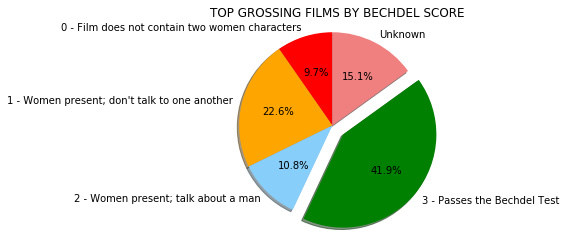

In [13]:
# Labels for the sections of our pie chart
labels = topgross_pie_df["Bechdel Result"]

# The values of each section of the pie chart
number_of_films = topgross_pie_df["Number of Films"]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightskyblue", "green", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0, 0.15, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(number_of_films, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("TOP GROSSING FILMS BY BECHDEL SCORE")
plt.axis("equal")

plt.show()

In [29]:
plotdata = pd.DataFrame({
    "0":[5,9],
    "1":[31,21],
    "2":[8,2],
    "3":[41,39],
    "Unknown":[7,14]
    }, index = ["Best Picture", "Top Grosser"]
)
plotdata

,0,1,2,3,Unknown
Best Picture,5,31,8,41,7
Top Grosser,9,21,2,39,14


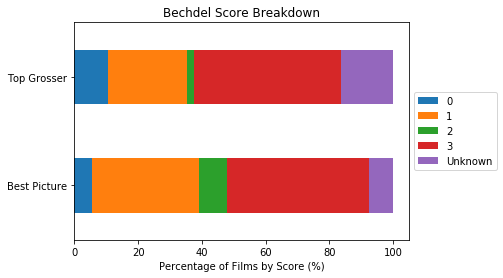

In [30]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Bechdel Score Breakdown")
plt.xlabel("Percentage of Films by Score (%)")
plt.show()

In [16]:
plotdata = pd.DataFrame({
    "0":[5,9],
    "1":[31,21],
    "2":[8,2],
    "3":[41,39]
    }, index = ["Best Picture", "Top Grosser"]
)
plotdata

,0,1,2,3
Best Picture,5,31,8,41
Top Grosser,9,21,2,39


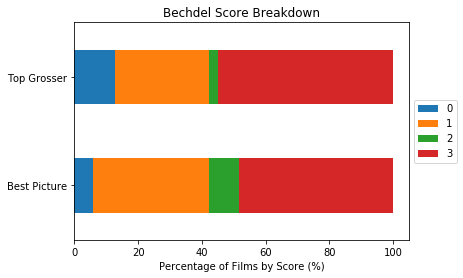

In [17]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Bechdel Score Breakdown")
plt.xlabel("Percentage of Films by Score (%)")
plt.show()

In [28]:
# All Bechdel scores Data Frame
bechdel_scores_df = pd.DataFrame({
    "Year": topgross_bechdel_df["Year"],
    "Best Picture": award_bechdel_df["Movie Title"],
    "Best Picture Bechdel": award_bechdel_df["Bechdel Score"],
    "Top Grosser": topgross_bechdel_df["Movie Title"],
    "Top Grosser Bechdel": topgross_bechdel_df["Bechdel Score"], 
})
bechdel_scores_df = bechdel_scores_df.dropna()
bechdel_scores_df = bechdel_scores_df.drop(bechdel_scores_df[bechdel_scores_df["Best Picture Bechdel"] == "Unknown"].index)
bechdel_scores_df = bechdel_scores_df.drop(bechdel_scores_df[bechdel_scores_df["Top Grosser Bechdel"] == "Unknown"].index)
bechdel_scores_df["Best Picture Bechdel"] = pd.to_numeric(bechdel_scores_df["Best Picture Bechdel"], downcast = "float")
bechdel_scores_df["Top Grosser Bechdel"] = pd.to_numeric(bechdel_scores_df["Top Grosser Bechdel"], downcast = "float")
bechdel_scores_df = bechdel_scores_df.sort_values('Year', ascending=False)
bechdel_scores_df.head(20)

,Year,Best Picture,Best Picture Bechdel,Top Grosser,Top Grosser Bechdel
92,2019,Parasite,3.0,Avengers: Endgame,3.0
91,2018,Green Book,1.0,Avengers: Infinity War,3.0
90,2017,The Shape of Water,3.0,Star Wars: The Last Jedi,3.0
89,2016,Moonlight,1.0,Captain America: Civil War,3.0
88,2015,Spotlight,1.0,Star Wars: The Force Awakens,3.0
87,2014,Birdman or (The Unexpected Virtue of Ignorance),3.0,Transformers: Age of Extinction,3.0
86,2013,12 Years a Slave,3.0,Frozen,3.0
85,2012,Argo,3.0,The Avengers,1.0
84,2011,The Artist,1.0,Harry Potter and the Deathly Hallows: Part 2,3.0
83,2010,The King's Speech,3.0,Toy Story 3,3.0


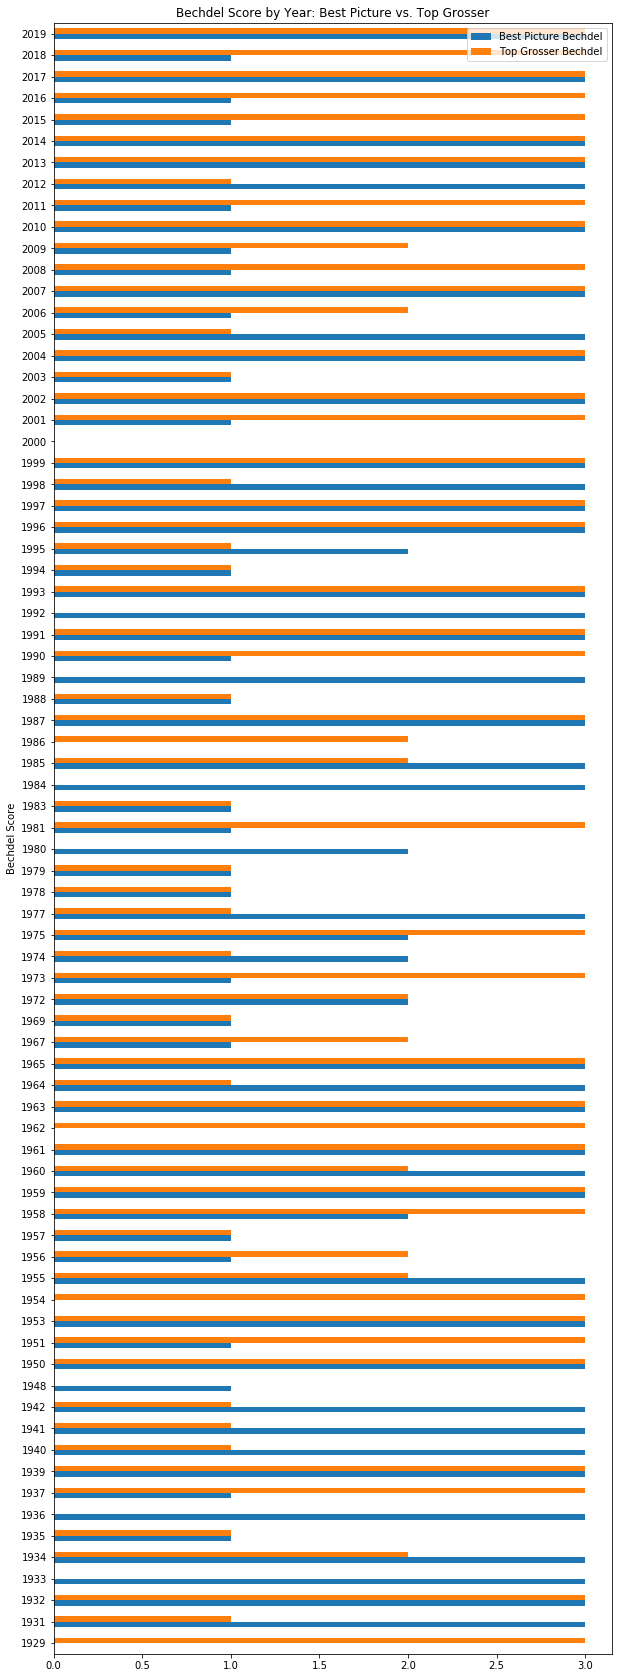

In [19]:
bechdel_scores_df.plot('Year',['Best Picture Bechdel', 'Top Grosser Bechdel'], kind = 'barh',figsize = (10,30))
plt.legend(loc="upper right")
plt.ylabel('Bechdel Score')
plt.title('Bechdel Score by Year: Best Picture vs. Top Grosser')
plt.show()

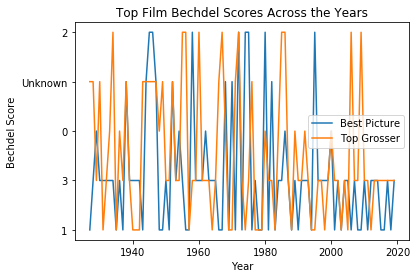

In [20]:
plt.plot(award_bechdel_df['year'], award_bechdel_df['Bechdel Score'], label = 'Best Picture')

plt.plot(topgross_bechdel_df['Year'], topgross_bechdel_df['Bechdel Score'], label = 'Top Grosser')

plt.xlabel('Year')
plt.ylabel('Bechdel Score')
plt.title('Top Film Bechdel Scores Across the Years')
plt.legend(loc = 'best')

# plt.tight_layout()

plt.show()

In [21]:
award_bechdel_count_no_unknowns = bechdel_scores_df["Best Picture Bechdel"].value_counts()
award_bechdel_count_no_unknowns

3.0    40
1.0    25
2.0     6
0.0     5
Name: Best Picture Bechdel, dtype: int64

In [22]:
topgrosser_bechdel_count_no_unknowns = bechdel_scores_df["Top Grosser Bechdel"].value_counts()
topgrosser_bechdel_count_no_unknowns

3.0    38
1.0    20
2.0    10
0.0     8
Name: Top Grosser Bechdel, dtype: int64

In [23]:
plotdata = pd.DataFrame({
    "0":[5,9],
    "1":[28,20],
    "2":[5,9],
    "3":[35,35],
    }, index = ["Best Picture", "Top Grosser"]
)
plotdata

,0,1,2,3
Best Picture,5,28,5,35
Top Grosser,9,20,9,35


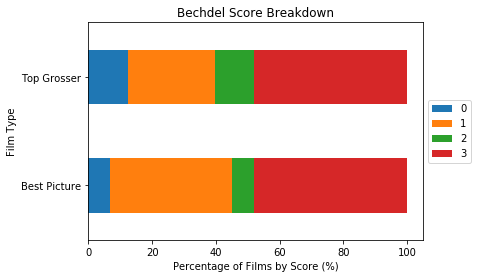

In [24]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Bechdel Score Breakdown")
plt.xlabel("Percentage of Films by Score (%)")
plt.ylabel("Film Type")
plt.show()